<h1><center>ITCS 4102 Python Project</center></h1>
<h1><center><b> Teammates: <b/>Fatih Agirtmis, Maria Handschu, Ryan Amarsingh</center></h1>


# Introduction

## Red & White Wine Quality

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. In this research notebook, we will be diving into what features are most responsible for the quality of a wine and which model yields the best accuracy for predicting quality of wine. 

The sections that are highlighted in blue go into the properties of the Python Language. These sections will be scattered across the notebook as we work through the problem. 

Please refer to the url below for more information about the dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

## Table of Contents

1. [Get the Data](#1-bullet) <br><br>

2. [Exploratory Data Analysis](#2-bullet)<br><br>

3. [Prep the Data](#3-bullet)<br><br>

4. [Training And Testing Data](#4-bullet)<br><br>
    
5. [Training Models and Predicting the Test Data](#5-bullet) <br>
    * [5.1 Random Forest](#5.1-bullet) <br>
    * [5.2 Stochastic Gradient Decent](#5.2-bullet) <br>
    * [5.3 Support Vector Machine](#5.3-bullet) <br> <br>
    
6. [Ranking Feature Importance](#6-bullet) <br><br>

7. [Present Solution](#7-bullet) <br><br>

## <font color='blue'> Imported Python Libraries </font> 

Below, we have imported several libraries that we will use throughout the notebook. These libraries are very powerful and contribute to the popularity of python. We will cover a few in detail below.

## Pandas:

<b>Overview: </b> 
- pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. 

<b>Main Features: </b> 
  - Easy handling of **missing data** (represented as
    `NaN`) in floating point as well as non-floating point data
  - Size mutability: columns can be **inserted and
    deleted** from DataFrame and higher dimensional
    objects
  - Automatic and explicit **data alignment**: objects can
    be explicitly aligned to a set of labels, or the user can simply
    ignore the labels and let `Series`, `DataFrame`, etc. automatically
    align the data for you in computations
  - Powerful, flexible **group by** functionality to perform
    split-apply-combine operations on data sets, for both aggregating
    and transforming data

## Numpy:

<b>Overview: </b> 
- NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

<b>Main Features: </b> 
  - Mathematical and logical operations on `Arrays`.
  - Fourier transforms and routines for shape manipulation.
  - Operations related to linear algebra. NumPy has in-built functions for linear algebra and random number   generation.

In [170]:
# Importing required packages.
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import HTML, display
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

print("Libraries Imported")

Libraries Imported


## <font color='blue'> Abstraction Mechanisms</font> 

## Functions

Functions are a construct to structure programs. They are known in most programming languages, sometimes also called subroutines or procedures. Functions are used to utilize code in more than one place in a program. The only way without functions to reuse code consists in copying the code.

There are **three** types of functions in Python:

- Built-in functions, such as help() to ask for help, min() to get the minimum value, print() to print an object to the terminal
- User-Defined Functions (UDFs), which are functions that users create to help them out 
- Anonymous functions, which are also called lambda functions because they are not declared with the standard def keyword.

Below, we have two user-defined functions that help create visulizations (confusion matrix and ROC Curve) that are used throughout the notebook. These functions also utilize many built-in function from the imported libraires in the process.  

<b>plot_confusion_matrix:</b> function that create the confusion matrices below 

In [171]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<b>plot_roc_curve:</b> function that creates the roc curves for the classifiers below

In [172]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# Get the Data <a class="anchor" id="1-bullet"></a>

We used exception handling to import the **Wine** dataset to take a look at the properties of the dataset and get an idea of any preprocessing needed. We also analyzed what datatypes we were going to be working with and checked to see if there any missing values int the dataset.  <br><br>

In [173]:
# declare and initialize the filename to equal the path of where our dataset is located
filename = "datasets/whiteWine.csv"

## <font color='blue'> Exception Handling </font>

## Try-Except 

**Definition:** The try and except block in Python is used to catch and handle exceptions. Python executes code following the try statement as a “normal” part of the program. The code that follows the except statement is the program’s response to any exceptions in the preceding try clause.

Here we are using a try catch block to check whether the filename in reference to the location of the dataset was correct. If it is incorrect, the catch block will return an error message. 

In [174]:
try:
    wine = pd.read_csv(filename)
    print("Data loaded.")
except FileNotFoundError:
    print("Data was not loaded. Please check the file path where you are referencing the dataset location") 

Data loaded.


In [175]:
# Get the top 5 rows of the datset
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [176]:
# Get the bottom 5 rows of the dataset
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [177]:
print("The Wine dataset has {} Rows and {} Variables".format(str(wine.shape[0]),str(wine.shape[1])))

The Wine dataset has 1599 Rows and 12 Variables


## <font color='blue'> Major Types in Python </font>

In our dataset, you can see the majority of the datatypes are of <b>float64</b>, with one datatype with <b>int64</b> (quality)

In [178]:
# Get the datatypes for the attributes in the dataset 
wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [179]:
# Get stats on the Wine dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [180]:
# Check if there are any null values in the dataset 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Conclusion 

After importing the file and analyzing the data, we can see that the dataset is made up of numeric attributes and is medium sized (1599 Rows and 12 Variables). There are no categorical attributes liek dates or names, but we do have one attribute that looks to be important named **rating**. There also is no missing data in the dataset which is good news. 

# Exploratory Data Analysis <a class="anchor" id="2-bullet"></a>

After importing and analyzing the data at a high-level, we needed to visualize the data in order to gain some insight on how these attributes are corelated and distributed. Using powerful visulization libraries seaborn and matplotlib, we are going to visualize the Wine characteristics and analyze what we see. 

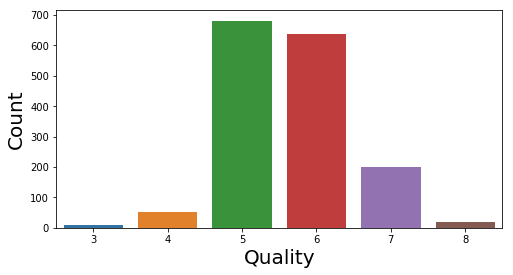

In [181]:
# Get the rating count 
plt.figure(figsize=(8,4))
sns.countplot(x='quality', data=wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Count').set_size(20)

**Analysis:** As expected, the rating count follows a normal distributed curve with most of the ratings in the middle between 5 and 6, and the rest scattered on the fringes.

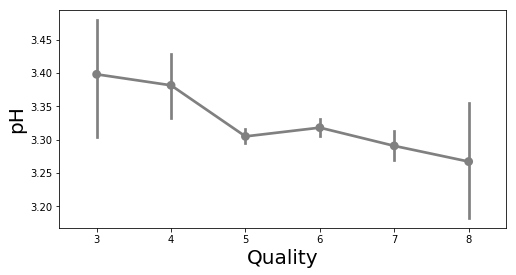

In [182]:
plt.figure(figsize=(8,4))
sns.pointplot(wine['quality'],wine['pH'], color='grey')
plt.xlabel('Quality').set_size(20)
plt.ylabel('pH').set_size(20)

**Analysis:** We can infer that higher quality wines have a comparatively low pH/high Acidity

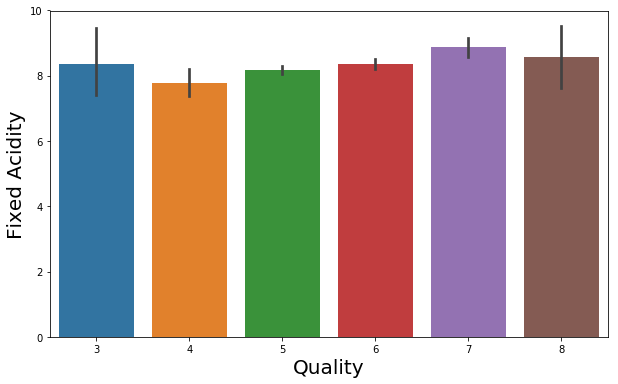

In [183]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Fixed Acidity').set_size(20)

**Analysis:** Here we see that fixed acidity does not give any specification to classify the quality.

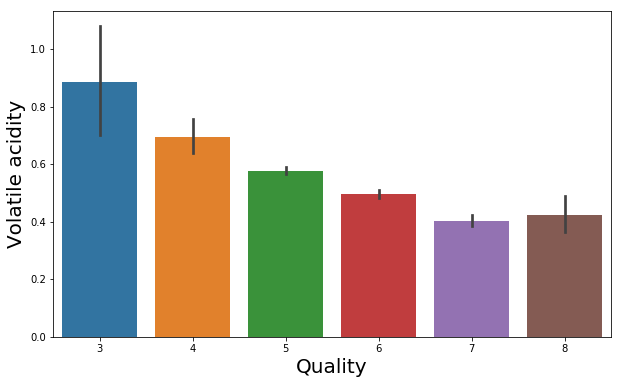

In [184]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Volatile acidity').set_size(20)

**Analysis:** Here we see that its quite a downing trend in the volatile acidity as we go higher the quality 

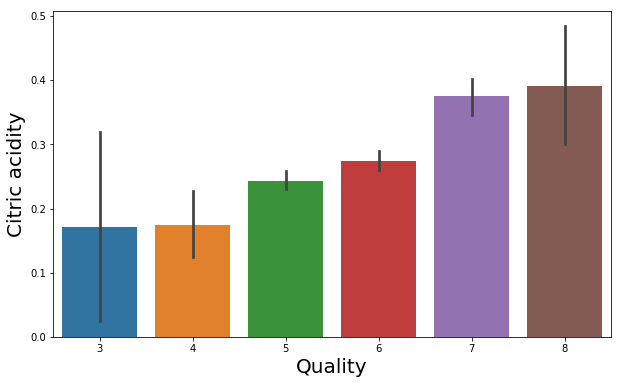

In [185]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Citric acidity').set_size(20)

**Analysis:** Composition of citric acid go higher as we go higher in the quality of the wine

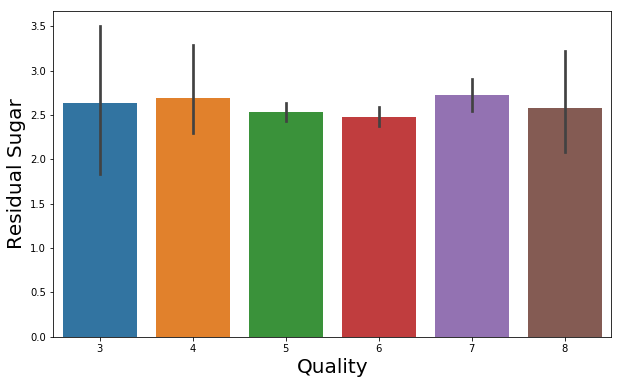

In [186]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Residual Sugar').set_size(20)

**Analysis:** Residual sugar seems to have little affect on the quality of the wine

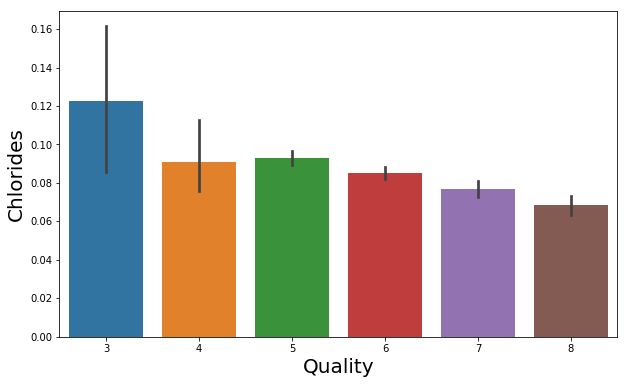

In [187]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Chlorides').set_size(20)

**Analysis:** Composition of chloride also go down as we go higher in the quality of the wine

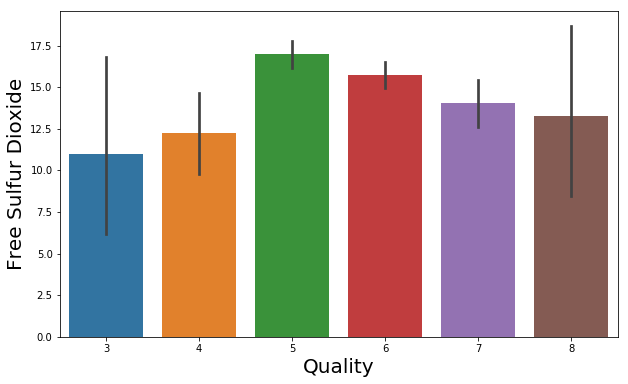

In [188]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Free Sulfur Dioxide').set_size(20)

**Analysis:** Free sulfur dioxide seems to gradually increase with the quality of the wine

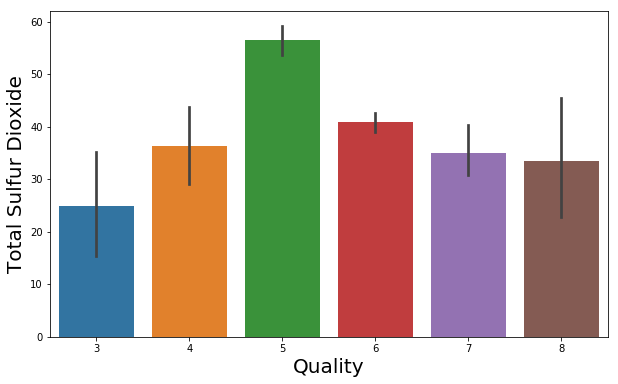

In [189]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Total Sulfur Dioxide').set_size(20)

**Analysis:** Total sulfur dioxide seems to gradually increase with the quality of the wine

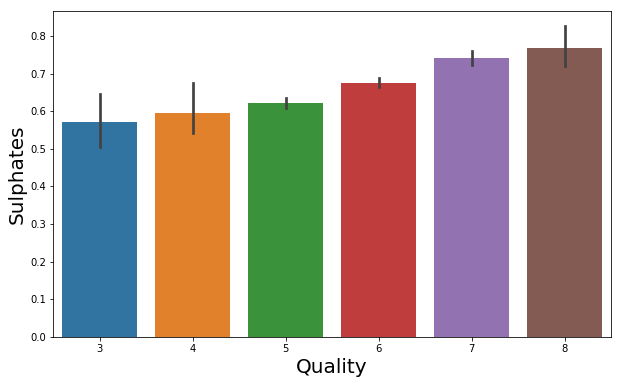

In [190]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Sulphates').set_size(20)

**Analysis:** Sulphates level goes higher with the quality of wine

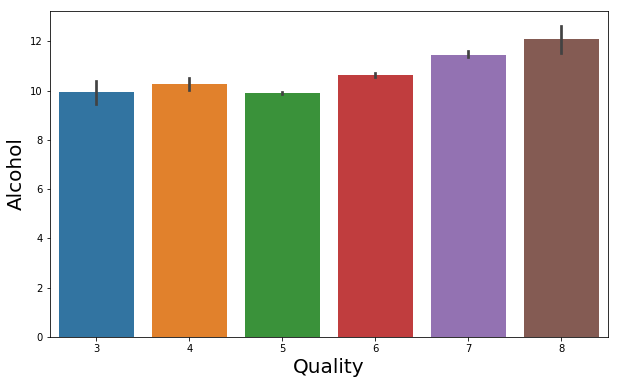

In [191]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)
plt.xlabel('Quality').set_size(20)
plt.ylabel('Alcohol').set_size(20)

**Analysis:** Alcohol level also goes higher as te quality of wine increases

# Prep the Data <a class="anchor" id="3-bullet"></a>

Now that we have a good idea of the relationship between the attributes of wine to the quality ranking of the wine, we can begin to prep the data for modeling. 

Making binary classificaion for the response variable.
Dividing wine as good and bad by giving the limit for the quality

In [192]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [193]:
# Assign a labels to our quality variable
label_quality = LabelEncoder()

In [194]:
# Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [195]:
# Get the counts of 0 and 1 quality 
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

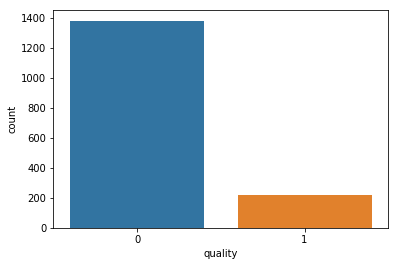

In [196]:
# Graph that quality 
sns.countplot(wine['quality'])

In [197]:
# Check again if there are any null values in the dataset 
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Training And Testing Data  <a class="anchor" id="4-bullet"></a>

In [198]:
# Now seperate the dataset as response variable and feature variabes
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [199]:
# Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [200]:
# Import Standard scaling 
sc = StandardScaler()

In [201]:
# Applying Standard scaling to get optimized result
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training Models and Predicting the Test Data  <a class="anchor" id="5-bullet"></a>

## Random Forest  <a class="anchor" id="5.1-bullet"></a>

<b>Reference: </b> https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<b>Definition:</b>
- Random Forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees

<b>Advantages:</b>
- It is one of the most accurate learning algorithms available. For many data sets, it produces a highly accurate classifier.
- It runs efficiently on large databases.
- It can handle thousands of input variables without variable deletion.
- It gives estimates of what variables are important in the classification.

<b>Disadvantages:</b>
- Random forests have been observed to overfit for some datasets with noisy classification/regression tasks.
- For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels. Therefore, the variable importance scores from random forest are not reliable for this type of data.

In [202]:
rfc = RandomForestClassifier(n_estimators = 250) # import Random Forest classifier 

In [203]:
# Fit linear model with Random Forest
# X_train: Training data
# y_train: Target values
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [204]:
# Predict the class labels for samples in X_test
pred_rfc = rfc.predict(X_test)

In [205]:
# Print the classification report 
print(classification_report(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.97      0.93       273
          1       0.71      0.36      0.48        47

avg / total       0.87      0.88      0.87       320



<b>Random forest gives the accuracy of 87%</b>

## Stochastic Gradient Decent <a class="anchor" id="5.2-bullet"></a>

<b>Reference: </b> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

<b>Definition:</b>
- This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.
- This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

<b>Advantages:</b>
- (Sometimes) faster convergence: The high througput may also translate to faster convergence depending on the variance in the dataset and the learning rate used.
- High quality gradient: Mini batching allows for a high quality gradient and this will be really useful allowing one to use high learning rates.

<b>Disadvantages:</b>
- Low final accuracy: Many times mini batching may result in low final accuracy since the noise in the gradient is really helpful towards the end to extract that last 0.5%.

In [206]:
# Import the SGDC Classifier 
sgd = SGDClassifier(max_iter=4, penalty=None)

In [207]:
# Fit linear model with Stochastic Gradient Descent 
# X_train: Training data
# y_train: Target values
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=4, n_iter=None,
       n_jobs=1, penalty=None, power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [208]:
# Predict the class labels for samples in X_test
pred_sgd = sgd.predict(X_test)

In [209]:
# Print the classification report 
print(classification_report(y_test, pred_sgd))

             precision    recall  f1-score   support

          0       0.93      0.82      0.88       273
          1       0.39      0.66      0.49        47

avg / total       0.85      0.80      0.82       320



<b>84% accuracy using stochastic gradient descent classifier</b>

## Support Vector Machine <a class="anchor" id="5.3-bullet"></a>

<b>Reference: </b> https://scikit-learn.org/stable/modules/svm.html

<b>Definition:</b>
- Are a set of supervised learning methods used for classification, regression and outliers detection.

<b>Advantages:</b>
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels

<b>Disadvantages:</b>
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

In [210]:
# Import the SGDC Classifier 
svc = SVC()

In [211]:
# Fit linear model with Support Vector Machine 
# X_train: Training data
# y_train: Target values
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [212]:
# Predict the class labels for samples in X_test
pred_svc = svc.predict(X_test)

In [213]:
# Print the classification report 
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320



<b>Support vector classifier gets 86%</b>

## Confusion Matrices 

### Confusion Matrix for Random Forest

In [214]:
# sklearn.metrics.confusion_matrix
# y_test: Ground truth (correct) target values.
# pred_rfc: Estimated targets as returned by a classifier.
cnf_matrix = confusion_matrix(y_test, pred_rfc)

Confusion matrix, without normalization
[[266   7]
 [ 30  17]]


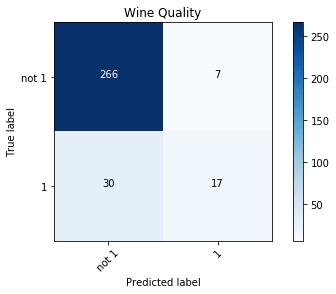

In [215]:
# Confusion matrix for the random forest classification
plot_confusion_matrix(cnf_matrix, classes=['not 1','1'], title='Wine Quality')

**What did we learn from this matrix?**
- There are two possible predicted classes: 0(bad) and 1(good). If we were predicting the quality of a wine, for example, "0" would mean the wine was not very good, and "1" would mean the quality of the wine was quite good.
- The classifier made a total of 320 predictions
- Out of those 320 cases, the classifier predicted "1" 47 times, and "no" 273 times.

### Confusion Matrix for SGD

In [216]:
cnf_matrix = confusion_matrix(y_test, pred_sgd)

Confusion matrix, without normalization
[[225  48]
 [ 16  31]]


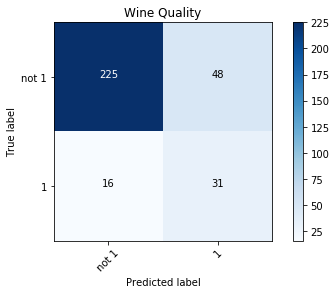

In [217]:
# Confusion matrix for the stochastic gradient decent classifier
plot_confusion_matrix(cnf_matrix, classes=['not 1','1'], title='Wine Quality')

**What did we learn from this matrix?**
- There are two possible predicted classes: 0(bad) and 1(good). If we were predicting the quality of a wine, for example, "0" would mean the wine was not very good, and "1" would mean the quality of the wine was quite good.
- The classifier made a total of 320 predictions
- Out of those 320 cases, the sgd predicted "1" 47 times, and "no" 273 times.
- However, confusion matrix has less True negatives (220 vs 266) with more True positives (21 vs 35)   

### Confusion Matrix for Support Vector Machine

In [218]:
cnf_matrix = confusion_matrix(y_test, pred_svc)

Confusion matrix, without normalization
[[268   5]
 [ 35  12]]


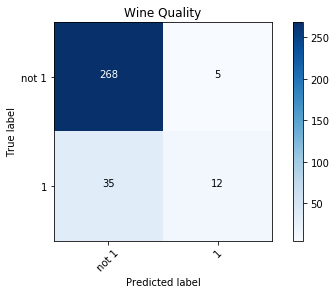

In [219]:
# Confusion matrix for the random forest classification
plot_confusion_matrix(cnf_matrix, classes=['not 1','1'], title='Wine Quality')

**What did we learn from this matrix?**
- There are two possible predicted classes: 0(bad) and 1(good). If we were predicting the quality of a wine, for example, "0" would mean the wine was not very good, and "1" would mean the quality of the wine was quite good.
- The classifier made a total of 320 predictions
- Out of those 320 cases, the classifier predicted "1" 47 times, and "no" 273 times.

## Receiver Operating Characteristic (ROC) Curve

### ROC Curve for Random Forest 

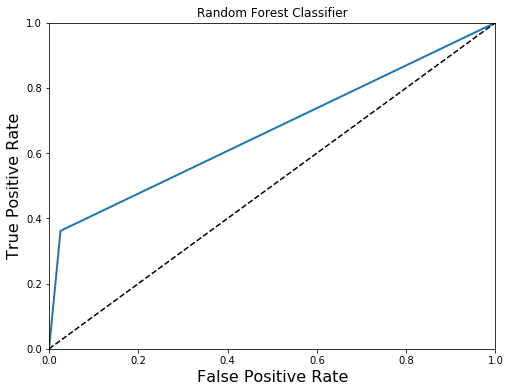

In [220]:
# Get the ROC Curve for RFC
fpr, tpr, thresholds = roc_curve(y_test, pred_rfc)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("Random Forest Classifier")
plt.show()

In [221]:
roc_auc_score(y_test, pred_rfc)

0.6680305510092743

**What did we learn from the ROC Curve for Random Forest?**
- By looking at the shape of the ROC curve, we can evaluate that towards the bottom of left corner where the grpah is closet to the random line, the model is missclassifying at X=0. The curve stables out as it goes higher which indicates that out model is stable. 

### ROC Curve for SGDC

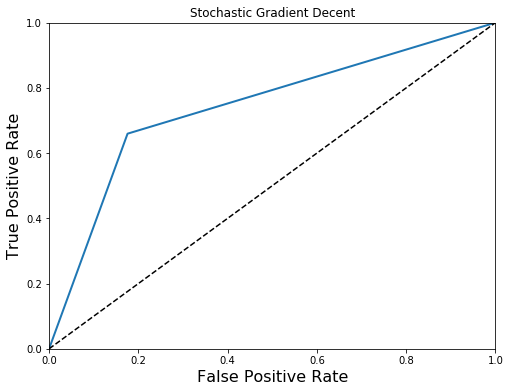

In [222]:
# Get the ROC Curve for SGDC
fpr, tpr, thresholds = roc_curve(y_test, pred_sgd)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("Stochastic Gradient Decent")
plt.show()

In [223]:
roc_auc_score(y_test, pred_sgd)

0.7418751461304652

**What did we learn from the ROC Curve for SGDC?**
- By looking at the shape of the ROC curve, we can evaluate that the curve starts out between the y axis and the random line and then stables out as it goes up. We can see that the model is less stable then the Random Forest ROC by a fraction, as the two scores are almost identical. 

### ROC Curve for Support Vector Machine

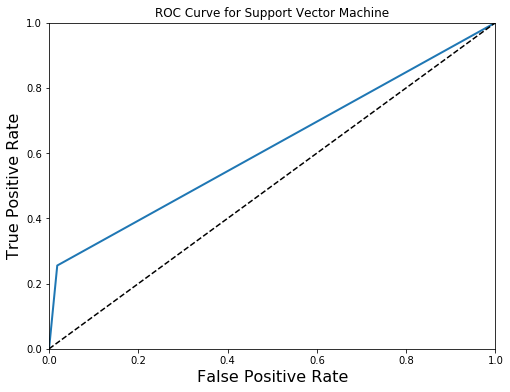

In [224]:
# Get the ROC Curve for SVC
fpr, tpr, thresholds = roc_curve(y_test, pred_svc)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("ROC Curve for Support Vector Machine")
plt.show()

In [225]:
roc_auc_score(y_test, pred_svc)

0.6185020653105758

**What did we learn from the ROC Curve for SVC?**
- By looking at the shape of the ROC curve, we can evaluate the ROC Curve is less stable than the prior two models with a score of .61 compared to .69. 

## Which model yields the best performance measure?

In [226]:
comparison = pd.DataFrame({'models': ["SVC","Random Forest","Stochastic Gradient Decent Classifier"],
                           'accuracies': [accuracy_score(y_test, pred_svc), accuracy_score(y_test, pred_rfc), accuracy_score(y_test, pred_sgd)]})

In [227]:
comparison

,accuracies,models
0,0.875000,SVC
1,0.884375,Random Forest
2,0.800000,Stochastic Gradient Decent Classifier


We can see Random Forest model has the best accurary ratio for predicting our wine quality. SVC and SGDC were not as accurate as Random Forrest but their results were not bad. Between the two of them their results were very close to each other. 

# Ranking Feature Importance  <a class="anchor" id="6-bullet"></a>

Now that we have found our most accurate model (Random Forest), we want to find which features are the most important when determining the quality of data. 

In [228]:
rfc = RandomForestClassifier(n_estimators=200)

In [230]:
# fit the data to the classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [231]:
# create the feature importance dataframe 
feature_importances = pd.DataFrame(rfc.feature_importances_, index = X.columns, columns=
                                   ['importance']).sort_values('importance', ascending=False)
# Output the feature importance 
feature_importances

,importance
alcohol,0.177626
sulphates,0.118006
volatile acidity,0.108629
density,0.089857
citric acid,0.089248
total sulfur dioxide,0.078033
chlorides,0.077508
fixed acidity,0.075622
residual sugar,0.064014
pH,0.060800


In [102]:
# Output the feature importance 
feature_importances

,importance
alcohol,0.170088
sulphates,0.122062
volatile acidity,0.114411
density,0.088767
citric acid,0.085934
total sulfur dioxide,0.081042
chlorides,0.075016
fixed acidity,0.069651
residual sugar,0.068295
pH,0.062603


# Analysis

After analyzing the feature importance ranking, I personally believe that it is accurate. The alcohol content of wine is going to have a huge affect on the quality because ultimatley that is why people choose to consume wine. 

# Present Solution <a class="anchor" id="7-bullet"></a>

Wine providers who are looking to increase revenue with their white wine stock may want to take a look at the alcohol percentage of their white wine. Most likely it is lower than their competors and would make sense why their profits are lower. Most of the other chemical components do not play a factor on whether a wine consumer will like the drink.  